In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from mplsoccer.pitch import Pitch
%matplotlib inline  
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
#importing all the needed libraries
from adjustText import adjust_text
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.patches as patches
from pywaffle import Waffle
# from highlight_text.htext import htext, fig_htext

In [56]:
import asyncio
import json

import aiohttp

from understat import Understat
import nest_asyncio
nest_asyncio.apply()

In [57]:
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    player_shots = await understat.get_player_shots(
            619,)

    a=json.dumps(player_shots)
    b=json.loads(a)
loop = asyncio.get_event_loop()

In [58]:
df=pd.json_normalize(b)

In [59]:
ag_latest=df[df["season"]=="2019"]

In [60]:
ag_latest.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
619,309936,85,Goal,0.885,0.5,0.761132001876831,Sergio Agüero,a,619,Penalty,2019,RightFoot,11644,West Ham,Manchester City,0,5,2019-08-10 12:30:00,None,Standard
620,310776,34,Goal,0.9640000152587891,0.43900001525878907,0.5193020105361938,Sergio Agüero,h,619,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Kevin De Bruyne,Cross
621,310780,45,BlockedShot,0.775,0.5879999923706055,0.037685200572013855,Sergio Agüero,h,619,OpenPlay,2019,RightFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Ilkay Gündogan,Pass
622,310784,52,MissedShots,0.870999984741211,0.6430000305175781,0.13052800297737122,Sergio Agüero,h,619,OpenPlay,2019,LeftFoot,11659,Manchester City,Tottenham,2,2,2019-08-17 17:30:00,Raheem Sterling,Throughball
623,312919,14,Goal,0.9180000305175782,0.514000015258789,0.5008289813995361,Sergio Agüero,a,619,OpenPlay,2019,LeftFoot,11671,Bournemouth,Manchester City,1,3,2019-08-25 14:00:00,Kevin De Bruyne,None


In [61]:
data=ag_latest["shotType"].value_counts().to_dict()

In [62]:
data

{'RightFoot': 56, 'LeftFoot': 13, 'Head': 7}

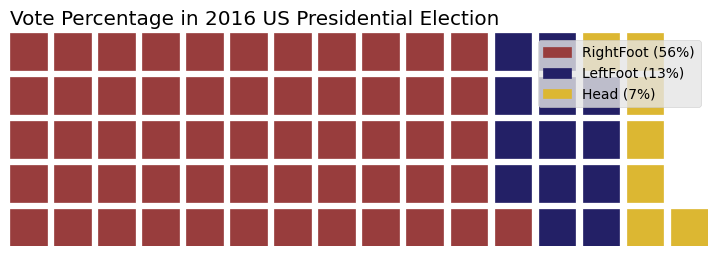

In [63]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={},
    starting_location='NW',
    block_arranging_style='snake',
    tight=False,
    figsize=(9, 6)
)


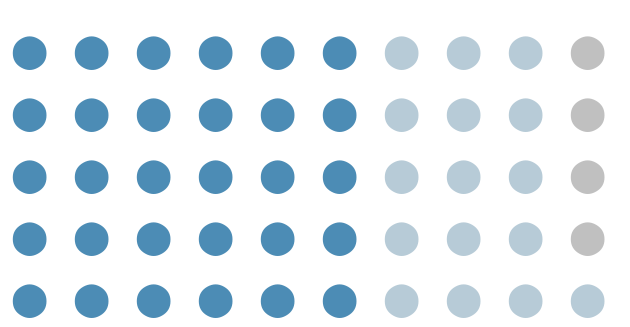

In [64]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[30, 16, 4],
    colors=["#4C8CB5", "#B7CBD7", "#C0C0C0"],
    characters='⬤',
    font_size=24
)



In [65]:
s=df["season"].unique()

In [66]:
s

array(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

In [67]:
li=[]
for i in range(0,len(s)):
    df[df["season"]==s[i]]
    li.append(df[df["season"]==s[i]]["shotType"].value_counts().to_list())

In [68]:
li

[[96, 40, 12],
 [80, 28, 11],
 [94, 34, 11],
 [62, 18, 15],
 [74, 31, 12, 1],
 [56, 13, 7],
 [14, 4, 1],
 [4, 2]]

In [69]:
for i in range(0,len(li)):
    for j in range(0,len(li[i])):
        li[i][j]==li[i][j]/2

In [70]:
t9=[1209,227,2371,65,2097,8260,594,755,318]

In [71]:
df=pd.DataFrame()
async with aiohttp.ClientSession() as session:
    understat = Understat(session)
    for i in t9:
        player_shots = await understat.get_player_shots(
            i,)
        a=json.dumps(player_shots)
        b=json.loads(a) 
        temp_df=pd.json_normalize(b)
        df=pd.concat([df,temp_df],axis=0,)
loop = asyncio.get_event_loop()

In [72]:
play=df["player"].unique()

In [73]:
gdf=df[(df["result"]=="Goal")&(df["season"]=="2019")]

In [74]:
goals=[]
for i in play:
    goals.append(gdf[gdf["player"]==i]["shotType"].value_counts().to_dict())
    

In [75]:
goals

[{'RightFoot': 28, 'LeftFoot': 6, 'Head': 2},
 {'RightFoot': 23, 'Head': 8, 'LeftFoot': 3},
 {'RightFoot': 24, 'LeftFoot': 5, 'Head': 2},
 {'RightFoot': 23, 'LeftFoot': 5},
 {'LeftFoot': 23, 'RightFoot': 2},
 {'LeftFoot': 9, 'RightFoot': 3, 'Head': 1},
 {'LeftFoot': 15, 'RightFoot': 4, 'Head': 4},
 {'RightFoot': 11, 'LeftFoot': 9, 'Head': 3},
 {'RightFoot': 16, 'LeftFoot': 3, 'Head': 3}]

In [76]:
goal=[]
for i in goals:
    goal.append(dict(sorted(i.items())))

In [77]:
goals=[]
for i in goal:
    goals.append(list(i.values()))

In [78]:
goals

[[2, 6, 28],
 [8, 3, 23],
 [2, 5, 24],
 [5, 23],
 [23, 2],
 [1, 9, 3],
 [4, 15, 4],
 [3, 9, 11],
 [3, 3, 16]]

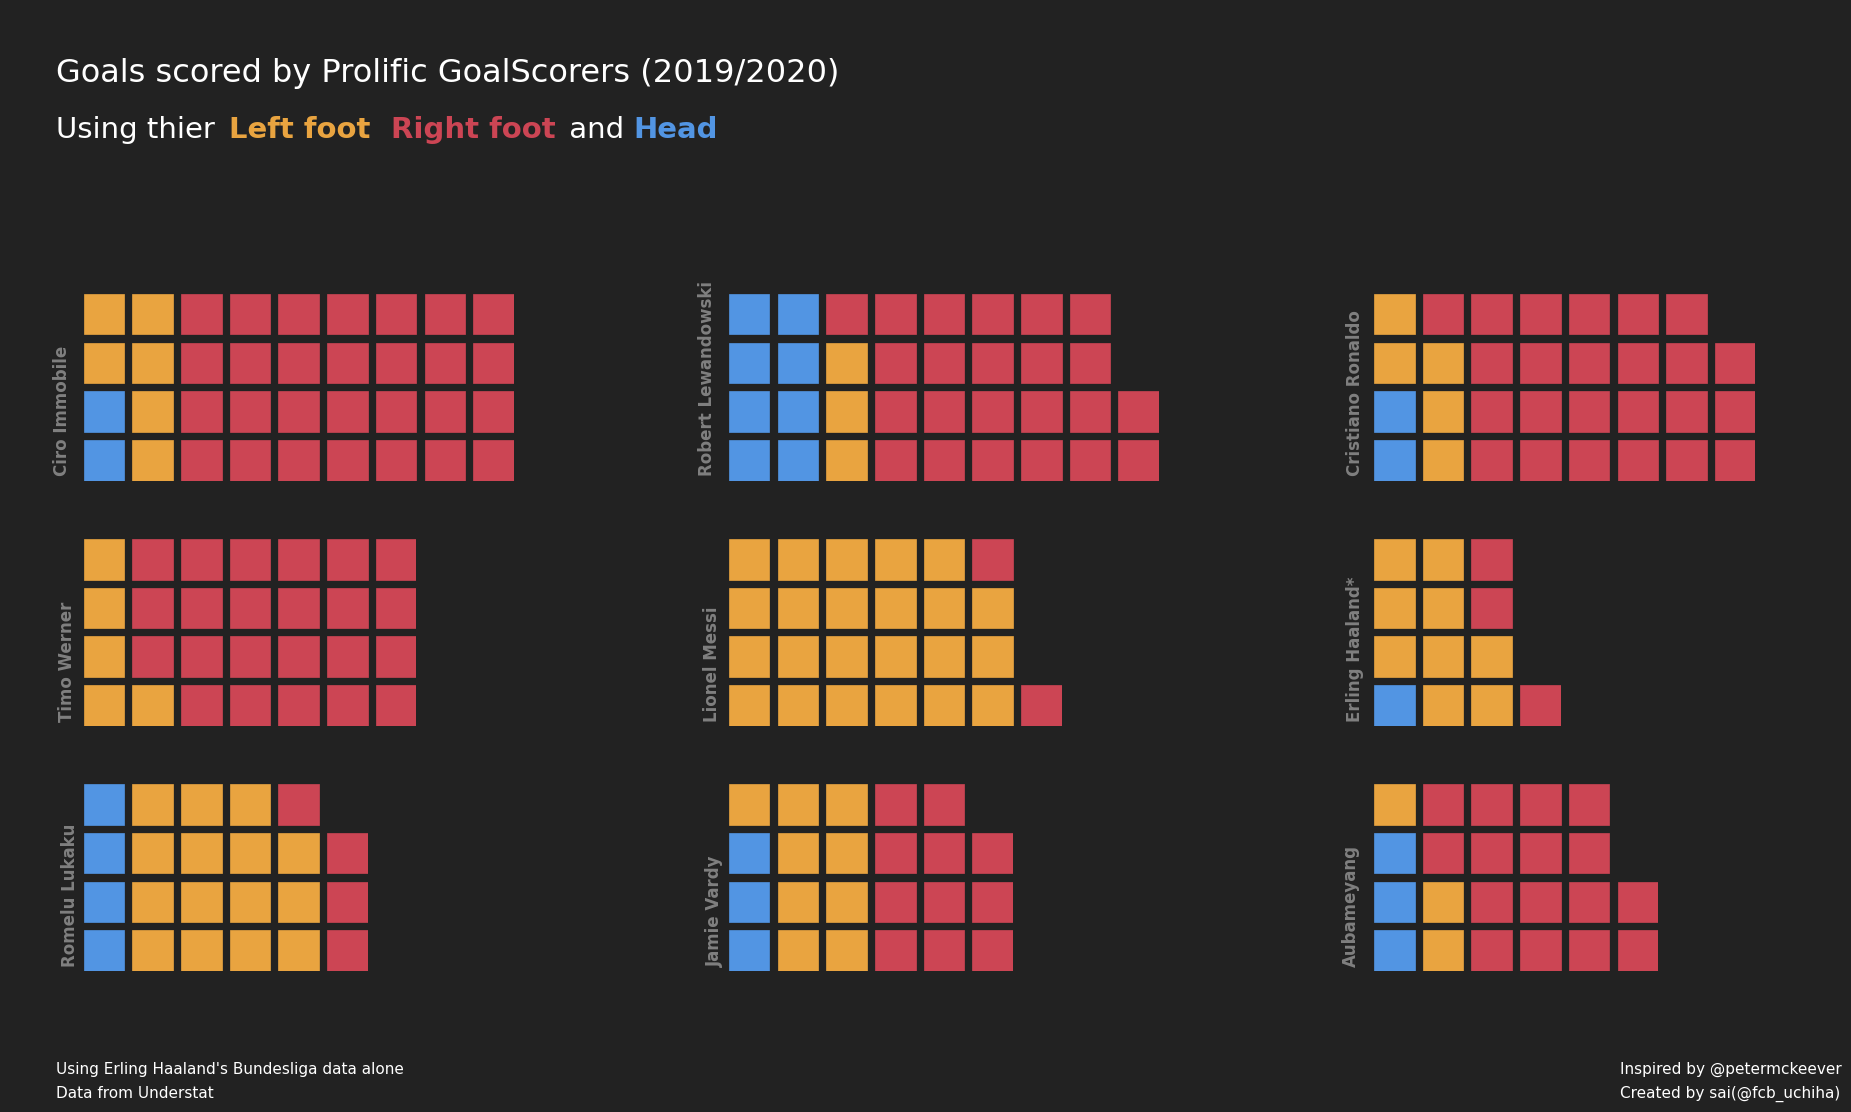

In [173]:

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        331: {
            'values':goals[0],
            'title': {
                'label': play[0],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
             'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
         332: {
            'values':goals[1],
            'title': {
                'label': play[1],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':-0,
                'color':"Grey",
                "fontweight":"bold"
            },
              'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
        333: {
            'values':goals[2],
            'title': {
                'label': play[2],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':-0,
                'color':"Grey",
                "fontweight":"bold"
            },
             'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
        334: {
            'values':goals[3],
            'title': {
                'label': play[3],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
             'colors':["#E9A440", "#CC4554"]
        },
        335: {
            'values':goals[4],
            'title': {
                'label': play[4],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
             'colors':["#E9A440", "#CC4554"]
        },
        336: {
            'values':goals[5],
            'title': {
                'label': play[5]+"*",
                'rotation': 90,
                'x':-0.1,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
             'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
        337: {
            'values':goals[6],
            'title': {
                'label': play[6],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
            'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
        338: {
            'values':goals[7],
            'title': {
                'label':play[7],
                'rotation': 90,
                'x':-0.05,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold"
            },
            'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
        339: {
            'values':goals[8],
            'title': {
                'label':"Aubameyang",
                'rotation': 90,
                'x':-0.08,
                'fontsize':12,
                'y':0,
                'color':"Grey",
                "fontweight":"bold",
                
            },
            'colors':["#5295E3", "#E9A440", "#CC4554"]
        },
    },rows=4,figsize=(23,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=1.4)
fig.set_facecolor("#222222")
fig.text(-0.02,1.19,"`",fontsize=23,color="#222222")
fig.text(0.0,1.13, 'Goals scored by Prolific GoalScorers (2019/2020)',fontsize=23,color="white")
fig.text(0.0,1.06, 'Using thier',fontsize=21,color="white"),
fig.text(0.075157407407407,1.06, 'Left foot',fontsize=21,color="#E9A440",fontweight="bold"),
fig.text(0.1454791666666667, 1.06, 'Right foot',fontsize=21,color="#CC4554",fontweight="bold"),
fig.text(0.219050925925926, 1.06, ' and ',fontsize=21,color="white")
fig.text(0.250856481481484, 1.06, 'Head',fontsize=21,color="#5295E3",fontweight="bold")
fig.text(0.68,-0.11,"Inspired by @petermckeever",fontsize=11,color="white")
fig.text(0.68,-0.14,"Created by sai(@fcb_uchiha)",fontsize=11,color="white")
fig.text(0,0.81,"`",fontsize=18,color="#222222")
fig.text(0,-0.11,"Using Erling Haaland's Bundesliga data alone",fontsize=11,color="white")
fig.text(0,-0.14,"Data from Understat",fontsize=11,color="white")

# fig.set_size_inches(23, 8)
plt.tight_layout()
plt.savefig('waffle.png', bbox_inches='tight',dpi=500)

